# Urban Air Pollution Challenge
Prediction the concentration of PM25 in the air

In [1]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## reading necessary data
data_loc = "x__data/"
df_train = pd.read_csv(f"{data_loc}/train.csv")
df_test = pd.read_csv(f"{data_loc}/test.csv")

In [3]:
## taking a look at the training data
df_train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## taking a look at the testing data
df_test.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789


In [5]:
print(df_train.shape)
print(df_test.shape)

(30557, 82)
(16136, 77)


## EDA

In [6]:
## checking out nulls
(df_train.isna().sum().sort_values(ascending=False)/df_train.shape[0])[:60]

L3_CH4_solar_zenith_angle                              0.810453
L3_CH4_solar_azimuth_angle                             0.810453
L3_CH4_sensor_zenith_angle                             0.810453
L3_CH4_sensor_azimuth_angle                            0.810453
L3_CH4_aerosol_optical_depth                           0.810453
L3_CH4_aerosol_height                                  0.810453
L3_CH4_CH4_column_volume_mixing_ratio_dry_air          0.810453
L3_NO2_tropospheric_NO2_column_number_density          0.283699
L3_HCHO_tropospheric_HCHO_column_number_density_amf    0.242989
L3_HCHO_tropospheric_HCHO_column_number_density        0.242989
L3_HCHO_solar_zenith_angle                             0.242989
L3_HCHO_solar_azimuth_angle                            0.242989
L3_HCHO_sensor_zenith_angle                            0.242989
L3_HCHO_sensor_azimuth_angle                           0.242989
L3_HCHO_cloud_fraction                                 0.242989
L3_HCHO_HCHO_slant_column_number_density

In [7]:
## removing columns from training data
cols_to_rem = [
    'L3_CH4_solar_zenith_angle',
    'L3_CH4_solar_azimuth_angle',
    'L3_CH4_sensor_zenith_angle',
    'L3_CH4_sensor_azimuth_angle',
    'L3_CH4_aerosol_optical_depth',
    'L3_CH4_aerosol_height',
    'L3_CH4_CH4_column_volume_mixing_ratio_dry_air'         
]

temp_train = df_train.drop(cols_to_rem, axis=1)

In [8]:
## getting the columns in the training data that are not in the testing data
train_cols = set(df_train.columns)
test_cols = set(df_test.columns)

diff_cols = list(train_cols - test_cols)

In [9]:
### checking whether any of the columns to remove has a high correlation with target
df_train[cols_to_rem + diff_cols].corr()["target"].sort_values()

L3_CH4_solar_azimuth_angle                      -0.118004
L3_CH4_sensor_azimuth_angle                      0.012264
L3_CH4_sensor_zenith_angle                       0.031025
L3_CH4_solar_zenith_angle                        0.043264
L3_CH4_aerosol_height                            0.073632
L3_CH4_CH4_column_volume_mixing_ratio_dry_air    0.075086
L3_CH4_aerosol_optical_depth                     0.086445
target_count                                     0.094135
target_variance                                  0.184818
target_max                                       0.630801
target_min                                       0.818803
target                                           1.000000
Name: target, dtype: float64

In [10]:
## checking correlation of other columns to target
df_train.select_dtypes("number").corr()["target"].sort_values(ascending=False)[:40]

target                                             1.000000
target_min                                         0.818803
target_max                                         0.630801
L3_CO_CO_column_number_density                     0.375737
L3_HCHO_tropospheric_HCHO_column_number_density    0.347125
L3_HCHO_HCHO_slant_column_number_density           0.320849
L3_NO2_NO2_slant_column_number_density             0.315718
L3_NO2_NO2_column_number_density                   0.306772
L3_NO2_tropospheric_NO2_column_number_density      0.295380
target_variance                                    0.184818
L3_SO2_absorbing_aerosol_index                     0.152000
L3_CLOUD_cloud_top_pressure                        0.123855
L3_CLOUD_cloud_base_pressure                       0.097343
target_count                                       0.094135
L3_CH4_aerosol_optical_depth                       0.086445
L3_CH4_CH4_column_volume_mixing_ratio_dry_air      0.075086
L3_CH4_aerosol_height                   

In [11]:
df_train.select_dtypes("number").corr()["target"].sort_values(ascending=False)[40:]

L3_NO2_sensor_azimuth_angle                            0.003722
L3_O3_sensor_azimuth_angle                             0.001783
L3_NO2_solar_zenith_angle                              0.001192
L3_CO_H2O_column_number_density                       -0.000596
L3_HCHO_cloud_fraction                                -0.011736
L3_SO2_SO2_column_number_density_amf                  -0.016116
L3_SO2_cloud_fraction                                 -0.025099
precipitable_water_entire_atmosphere                  -0.031329
specific_humidity_2m_above_ground                     -0.035670
L3_SO2_solar_zenith_angle                             -0.037803
temperature_2m_above_ground                           -0.038818
L3_HCHO_solar_zenith_angle                            -0.038851
L3_CO_solar_zenith_angle                              -0.049490
L3_CLOUD_surface_albedo                               -0.053733
v_component_of_wind_10m_above_ground                  -0.055100
L3_O3_solar_zenith_angle                

In [12]:
df_train.isna().sum()[:40]

Place_ID X Date                                      0
Date                                                 0
Place_ID                                             0
target                                               0
target_min                                           0
target_max                                           0
target_variance                                      0
target_count                                         0
precipitable_water_entire_atmosphere                 0
relative_humidity_2m_above_ground                    0
specific_humidity_2m_above_ground                    0
temperature_2m_above_ground                          0
u_component_of_wind_10m_above_ground                 0
v_component_of_wind_10m_above_ground                 0
L3_NO2_NO2_column_number_density                  2189
L3_NO2_NO2_slant_column_number_density            2189
L3_NO2_absorbing_aerosol_index                    2189
L3_NO2_cloud_fraction                             2189
L3_NO2_sen

### Insights
- remove features with more than `80%` missing values
- `none` of the columns with more than `80%` missing values has high correlation with target

In [13]:
## getting n_largest features correlated with target

l = []

for col in df_train.select_dtypes("number").corr()["target"].sort_values(ascending=False)[1:12].index:
    if not col.startswith("target"):
        l.append(col)

In [14]:
df_train[l].isna().sum()

L3_CO_CO_column_number_density                     5423
L3_HCHO_tropospheric_HCHO_column_number_density    7425
L3_HCHO_HCHO_slant_column_number_density           7425
L3_NO2_NO2_slant_column_number_density             2189
L3_NO2_NO2_column_number_density                   2189
L3_NO2_tropospheric_NO2_column_number_density      8669
L3_SO2_absorbing_aerosol_index                     7308
L3_CLOUD_cloud_top_pressure                        1522
dtype: int64

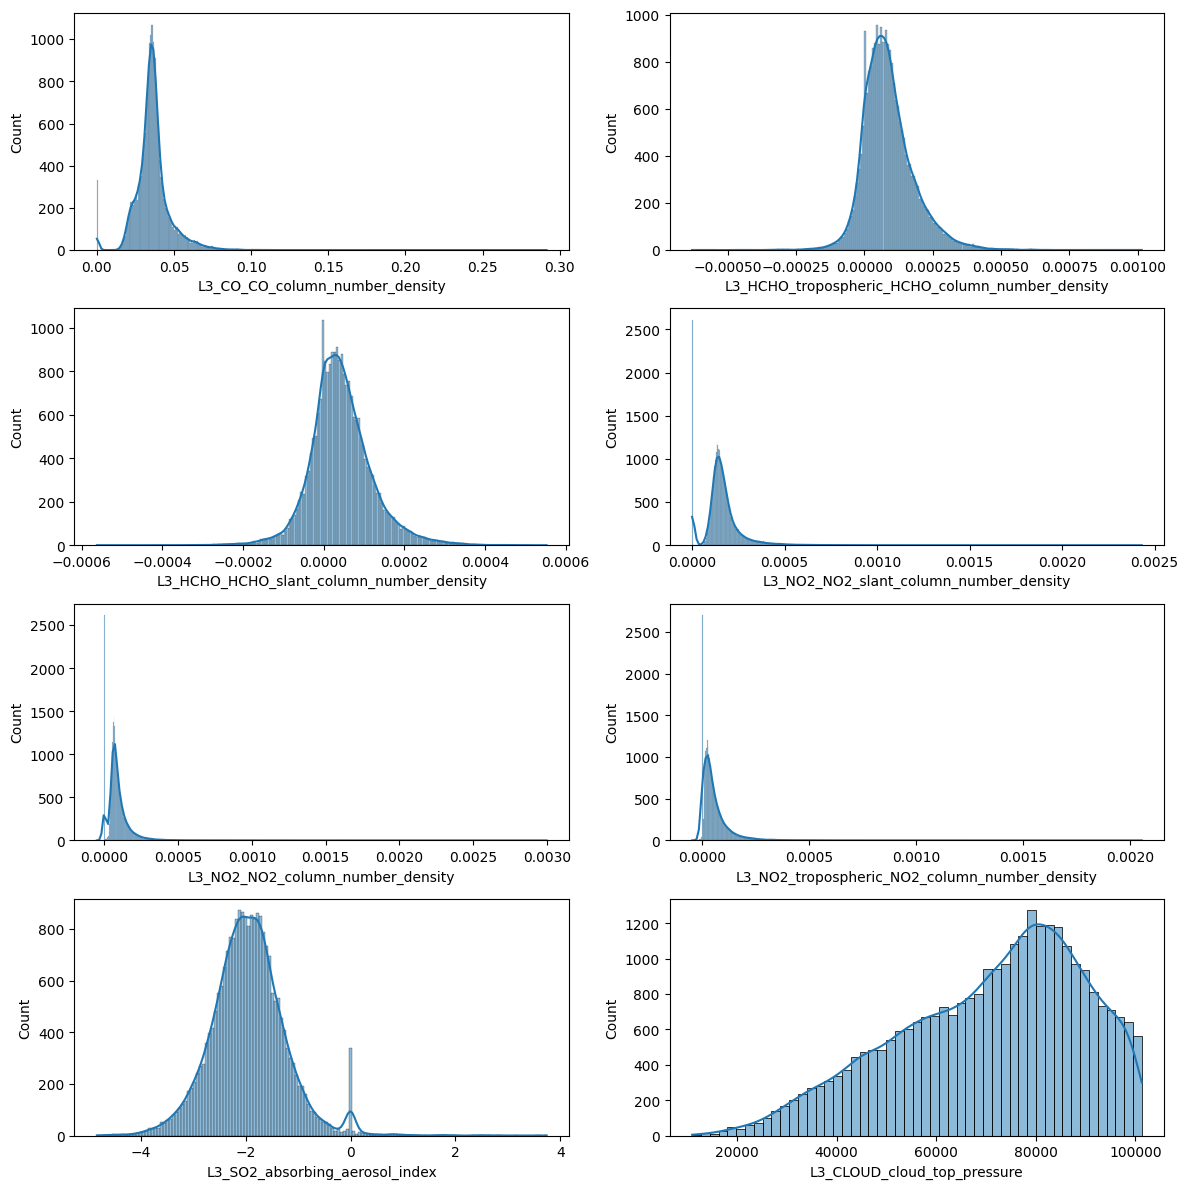

In [15]:
### plotting distributions for targets
fig, axes = plt.subplots(4,2, figsize=(12,12))
for ax, col in zip(axes.flatten(),l):
    sns.histplot(df_train[col], ax=ax, kde=True)


plt.tight_layout()
plt.show()

In [16]:
df_train[l].describe().loc["mean",:]

L3_CO_CO_column_number_density                         0.036230
L3_HCHO_tropospheric_HCHO_column_number_density        0.000088
L3_HCHO_HCHO_slant_column_number_density               0.000043
L3_NO2_NO2_slant_column_number_density                 0.000163
L3_NO2_NO2_column_number_density                       0.000094
L3_NO2_tropospheric_NO2_column_number_density          0.000056
L3_SO2_absorbing_aerosol_index                        -1.944519
L3_CLOUD_cloud_top_pressure                        70799.498221
Name: mean, dtype: float64

In [17]:
df_train[l].median()

L3_CO_CO_column_number_density                         0.035563
L3_HCHO_tropospheric_HCHO_column_number_density        0.000076
L3_HCHO_HCHO_slant_column_number_density               0.000037
L3_NO2_NO2_slant_column_number_density                 0.000150
L3_NO2_NO2_column_number_density                       0.000075
L3_NO2_tropospheric_NO2_column_number_density          0.000035
L3_SO2_absorbing_aerosol_index                        -1.963547
L3_CLOUD_cloud_top_pressure                        74094.354412
dtype: float64

In [18]:
df_train[l].skew().sort_values()

L3_CLOUD_cloud_top_pressure                       -0.534658
L3_HCHO_HCHO_slant_column_number_density           0.410458
L3_SO2_absorbing_aerosol_index                     0.510803
L3_HCHO_tropospheric_HCHO_column_number_density    0.905838
L3_CO_CO_column_number_density                     1.274629
L3_NO2_NO2_slant_column_number_density             4.109591
L3_NO2_tropospheric_NO2_column_number_density      6.185637
L3_NO2_NO2_column_number_density                   7.402073
dtype: float64

In [19]:
## looking into the negative correlated features
r = []

for col in df_train.select_dtypes("number").corr()["target"].sort_values(ascending=False)[-17:].index:
    if not col.startswith("target"):
        r.append(col)

In [20]:
df_train[r].isna().sum()

L3_CO_cloud_height                                      5423
L3_CLOUD_cloud_top_height                               1522
L3_O3_cloud_fraction                                     283
L3_CLOUD_cloud_fraction                                  374
L3_HCHO_tropospheric_HCHO_column_number_density_amf     7425
L3_CH4_solar_azimuth_angle                             24765
L3_CLOUD_cloud_optical_depth                            1522
L3_NO2_cloud_fraction                                   2189
u_component_of_wind_10m_above_ground                       0
L3_CO_solar_azimuth_angle                               5423
L3_NO2_solar_azimuth_angle                              2190
L3_SO2_solar_azimuth_angle                              7237
L3_HCHO_solar_azimuth_angle                             7425
L3_O3_solar_azimuth_angle                                283
L3_CLOUD_solar_azimuth_angle                             374
L3_AER_AI_solar_azimuth_angle                            197
L3_AER_AI_sensor_altitud

In [21]:
df_train[r].skew().sort_values()

L3_CH4_solar_azimuth_angle                             0.061542
L3_CLOUD_cloud_fraction                                0.384587
u_component_of_wind_10m_above_ground                   0.387020
L3_O3_cloud_fraction                                   0.413894
L3_HCHO_tropospheric_HCHO_column_number_density_amf    0.786242
L3_CO_cloud_height                                     0.811320
L3_NO2_cloud_fraction                                  0.960893
L3_CLOUD_cloud_top_height                              1.130542
L3_AER_AI_solar_azimuth_angle                          1.154523
L3_O3_solar_azimuth_angle                              1.156257
L3_NO2_solar_azimuth_angle                             1.156622
L3_AER_AI_sensor_altitude                              1.241691
L3_CLOUD_solar_azimuth_angle                           1.272288
L3_HCHO_solar_azimuth_angle                            2.002888
L3_SO2_solar_azimuth_angle                             2.074658
L3_CO_solar_azimuth_angle               

In [22]:
r[4:]

['L3_HCHO_tropospheric_HCHO_column_number_density_amf',
 'L3_CH4_solar_azimuth_angle',
 'L3_CLOUD_cloud_optical_depth',
 'L3_NO2_cloud_fraction',
 'u_component_of_wind_10m_above_ground',
 'L3_CO_solar_azimuth_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_SO2_solar_azimuth_angle',
 'L3_HCHO_solar_azimuth_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_CLOUD_solar_azimuth_angle',
 'L3_AER_AI_solar_azimuth_angle',
 'L3_AER_AI_sensor_altitude']

In [23]:
### fixing skew
skew_fix_cols = ["L3_HCHO_tropospheric_HCHO_column_number_density",
                    "L3_CO_CO_column_number_density",
                    "L3_NO2_NO2_slant_column_number_density",
                    "L3_NO2_tropospheric_NO2_column_number_density",
                    "L3_NO2_NO2_column_number_density",
                    'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
                    'L3_CH4_solar_azimuth_angle',
                     'L3_CLOUD_cloud_optical_depth',
                     'L3_CO_solar_azimuth_angle',
                     'L3_NO2_solar_azimuth_angle',
                     'L3_SO2_solar_azimuth_angle',
                     'L3_HCHO_solar_azimuth_angle',
                     'L3_O3_solar_azimuth_angle',
                     'L3_CLOUD_solar_azimuth_angle',
                     'L3_AER_AI_solar_azimuth_angle',
                     'L3_AER_AI_sensor_altitude',
                     "L3_NO2_cloud_fraction"
                   ]

df_train[skew_fix_cols].skew()

L3_HCHO_tropospheric_HCHO_column_number_density        0.905838
L3_CO_CO_column_number_density                         1.274629
L3_NO2_NO2_slant_column_number_density                 4.109591
L3_NO2_tropospheric_NO2_column_number_density          6.185637
L3_NO2_NO2_column_number_density                       7.402073
L3_HCHO_tropospheric_HCHO_column_number_density_amf    0.786242
L3_CH4_solar_azimuth_angle                             0.061542
L3_CLOUD_cloud_optical_depth                           3.346628
L3_CO_solar_azimuth_angle                              2.117308
L3_NO2_solar_azimuth_angle                             1.156622
L3_SO2_solar_azimuth_angle                             2.074658
L3_HCHO_solar_azimuth_angle                            2.002888
L3_O3_solar_azimuth_angle                              1.156257
L3_CLOUD_solar_azimuth_angle                           1.272288
L3_AER_AI_solar_azimuth_angle                          1.154523
L3_AER_AI_sensor_altitude               

In [24]:
np.sqrt(df_train[skew_fix_cols]).skew().sort_values()

C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


L3_CO_CO_column_number_density                        -1.917712
L3_HCHO_tropospheric_HCHO_column_number_density_amf   -1.446148
L3_NO2_NO2_slant_column_number_density                -0.685811
L3_HCHO_tropospheric_HCHO_column_number_density        0.216977
L3_NO2_cloud_fraction                                  0.278943
L3_NO2_NO2_column_number_density                       0.563960
L3_CO_solar_azimuth_angle                              0.580558
L3_SO2_solar_azimuth_angle                             0.889750
L3_NO2_tropospheric_NO2_column_number_density          0.988802
L3_HCHO_solar_azimuth_angle                            1.002784
L3_AER_AI_sensor_altitude                              1.235687
L3_CLOUD_cloud_optical_depth                           1.766666
L3_NO2_solar_azimuth_angle                             2.145496
L3_O3_solar_azimuth_angle                              2.339333
L3_CLOUD_solar_azimuth_angle                           3.586603
L3_AER_AI_solar_azimuth_angle           

In [25]:
sqrt_skew_fix = [
    "L3_NO2_NO2_slant_column_number_density",
    "L3_HCHO_tropospheric_HCHO_column_number_density",
    "L3_NO2_NO2_column_number_density",
    "L3_CO_solar_azimuth_angle"
]

In [26]:
(df_train[skew_fix_cols]**2).skew().sort_values()

L3_CO_solar_azimuth_angle                              -1.075121
L3_SO2_solar_azimuth_angle                             -1.041861
L3_HCHO_solar_azimuth_angle                            -1.015646
L3_CLOUD_solar_azimuth_angle                           -0.824799
L3_AER_AI_solar_azimuth_angle                          -0.779791
L3_O3_solar_azimuth_angle                              -0.757698
L3_NO2_solar_azimuth_angle                             -0.637889
L3_HCHO_tropospheric_HCHO_column_number_density         0.000000
L3_NO2_NO2_column_number_density                        0.000000
L3_NO2_tropospheric_NO2_column_number_density           0.000000
L3_NO2_NO2_slant_column_number_density                  0.000000
L3_CH4_solar_azimuth_angle                              0.308086
L3_AER_AI_sensor_altitude                               1.253738
L3_NO2_cloud_fraction                                   1.684238
L3_HCHO_tropospheric_HCHO_column_number_density_amf     2.731488
L3_CLOUD_cloud_optical_de

In [27]:
(df_train[skew_fix_cols]**2).skew().sort_values()[7:12].index

Index(['L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density', 'L3_CH4_solar_azimuth_angle'],
      dtype='object')

In [28]:
pow_skew_fix = ['L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density', 'L3_CH4_solar_azimuth_angle']

In [29]:
len(skew_fix_cols)

17

### Insights
- skewed data could shift the mean, making it a worse representative

In [30]:
## checking months out
months = pd.to_datetime(df_train["Date"]).dt.month
pd.concat([df_train["target"], months], axis=1).corr()

,target,Date
target,1.0000,-0.1228
Date,-0.1228,1.0000


In [45]:
class Cleaner():
    def __init__(self):
        self.cols_to_rem = [
            'L3_CH4_solar_zenith_angle',
            'L3_CH4_sensor_zenith_angle',
            'L3_CH4_sensor_azimuth_angle',
            'L3_CH4_aerosol_optical_depth',
            'L3_CH4_aerosol_height',
            'L3_CH4_CH4_column_volume_mixing_ratio_dry_air'         
        ]
    
        self.train_only_cols = ['target_min', 'target_variance', 'target_max', 'target_count']
    
        ## get medians and means from train and fill with them
        self.mean_fill_cols = ["L3_CLOUD_cloud_top_pressure",
                          "L3_SO2_absorbing_aerosol_index",
                          "L3_HCHO_HCHO_slant_column_number_density",
                          "L3_CLOUD_cloud_fraction",
                          "L3_O3_cloud_fraction",
                          'u_component_of_wind_10m_above_ground'
                         ]
    
        self.median_fill_cols = ["L3_HCHO_tropospheric_HCHO_column_number_density",
                            "L3_CO_CO_column_number_density",
                            "L3_NO2_NO2_slant_column_number_density",
                            "L3_NO2_tropospheric_NO2_column_number_density",
                            "L3_NO2_NO2_column_number_density",
                            'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
                             'L3_CLOUD_cloud_optical_depth',
                             'u_component_of_wind_10m_above_ground',
                             'L3_CO_solar_azimuth_angle',
                             'L3_NO2_solar_azimuth_angle',
                             'L3_SO2_solar_azimuth_angle',
                             'L3_HCHO_solar_azimuth_angle',
                             'L3_O3_solar_azimuth_angle',
                             'L3_CLOUD_solar_azimuth_angle',
                             'L3_AER_AI_solar_azimuth_angle',
                             'L3_AER_AI_sensor_altitude',
                            "L3_NO2_cloud_fraction"
                           ]
    
        self.sqrt_skew_fix = ["L3_NO2_NO2_slant_column_number_density",
                        ]
    
        self.pow_skew_fix = ['L3_HCHO_tropospheric_HCHO_column_number_density',
                        'L3_NO2_NO2_column_number_density',
                        'L3_NO2_tropospheric_NO2_column_number_density',
                        'L3_NO2_NO2_slant_column_number_density',
                       ]

        self.quad_skew_fix=["L3_CO_solar_azimuth_angle"]
        
    def fit(self, train):

        self.means = train[self.mean_fill_cols].mean()
        self.medians = train[self.median_fill_cols].median()
        
    ## function for preprocessing
    def transform(self, df, train=True):
    
        df = df.drop(self.cols_to_rem, axis=1)
    
        ## remove the train-only features if train is true
        if train: df = df.drop(self.train_only_cols, axis=1)

        ## filling with means
        for col in self.mean_fill_cols:
            df[col] = df[col].fillna(self.means[col])
        ## filling with medians
        for col in self.median_fill_cols:
            df[col] = df[col].fillna(self.medians[col])

        ## fixing skew with sqrt
        for col in self.sqrt_skew_fix:
            df[col] = np.sqrt(df[col])
        ## fixing skew with square
        for col in self.pow_skew_fix:
            df[col] = df[col]**2
        ## fixing skew with quad
        for col in self.quad_skew_fix:
            df[col] = df[col]**4

        ## getting month column
        df["Month"] = pd.to_datetime(df["Date"]).dt.month
        df = df.drop("Date", axis=1)

        df = df.ffill()
        df = df.bfill()

        return df
        

    

In [46]:
data_cleaner = Cleaner()
data_cleaner.fit(df_train)

In [47]:
temp_df = data_cleaner.transform(df_train)
# df_fixed.transform(df_train).isna().sum().sort_values(ascending=False)[:20]

In [48]:
temp_df.isna().sum().sort_values(ascending=False)[:20]

Place_ID X Date                                        0
Place_ID                                               0
L3_CLOUD_solar_azimuth_angle                           0
L3_CLOUD_sensor_zenith_angle                           0
L3_CLOUD_sensor_azimuth_angle                          0
L3_CLOUD_cloud_top_pressure                            0
L3_CLOUD_cloud_top_height                              0
L3_CLOUD_cloud_optical_depth                           0
L3_CLOUD_cloud_fraction                                0
L3_CLOUD_cloud_base_pressure                           0
L3_CLOUD_cloud_base_height                             0
L3_HCHO_tropospheric_HCHO_column_number_density_amf    0
L3_HCHO_tropospheric_HCHO_column_number_density        0
L3_HCHO_solar_zenith_angle                             0
L3_HCHO_solar_azimuth_angle                            0
L3_HCHO_sensor_zenith_angle                            0
L3_HCHO_sensor_azimuth_angle                           0
L3_CLOUD_solar_zenith_angle    

In [49]:
## sanity check
"Date" in temp_df

False

In [130]:
## checking some combinations out
def check_comb(df, col, func = lambda a, b: a*b):
    # df = df.sample(frac=0.4)
    cols = df.select_dtypes("number").columns
    cols = [c for c in cols if c not in ['target', 'target_min', 'target_variance', 'target_max', 'target_count', col]]
    result = []

    _min=_max=0
    _min_col = ""
    _max_col = ""
    for ccol in cols:
        val = func(df[col], df[ccol]).corr(df["target"])
        if val > _max:
            _max = val
            _max_col = ccol
        if val < _min:
            _min = val
            _min_col = ccol
        # result.append((f"{ccol}---{col}", val))

    return (f"{ccol}---{col}", _max_col, _max, _min_col, _min)

In [131]:
# pd.DataFrame(check_comb(temp_df, "L3_HCHO_cloud_fraction")).sort_values(by=1, ascending=False)
num_cols = temp_df.drop("target", axis=1).select_dtypes("number").columns

# check_comb(temp_df, "L3_HCHO_cloud_fraction")
mult_combs = pd.DataFrame([check_comb(temp_df, col) for col in num_cols], columns=["feature", "max_feature", "max", "min_feature", "min"])

In [132]:
mult_combs.sort_values(by="max", ascending=False)

,feature,max_feature,max,min_feature,min
25,Month---L3_CO_CO_column_number_density,L3_NO2_NO2_slant_column_number_density,0.380433,L3_AER_AI_solar_azimuth_angle,-0.310807
7,Month---L3_NO2_NO2_slant_column_number_density,L3_CO_CO_column_number_density,0.380433,L3_AER_AI_solar_azimuth_angle,-0.333517
53,Month---L3_AER_AI_sensor_altitude,L3_CO_CO_column_number_density,0.340508,L3_AER_AI_solar_azimuth_angle,-0.191169
33,Month---L3_HCHO_HCHO_slant_column_number_density,L3_CO_CO_column_number_density,0.337054,L3_AER_AI_solar_azimuth_angle,-0.328126
19,Month---L3_O3_O3_effective_temperature,L3_CO_CO_column_number_density,0.336283,L3_AER_AI_solar_azimuth_angle,-0.195263
...,...,...,...,...,...
35,Month---L3_HCHO_sensor_azimuth_angle,L3_AER_AI_sensor_azimuth_angle,0.109649,L3_NO2_NO2_column_number_density,-0.037524
63,Month---L3_SO2_sensor_azimuth_angle,L3_AER_AI_sensor_azimuth_angle,0.109000,L3_NO2_tropospheric_NO2_column_number_density,-0.034976
29,Month---L3_CO_sensor_azimuth_angle,L3_AER_AI_sensor_azimuth_angle,0.089557,L3_NO2_NO2_column_number_density,-0.018796
58,Month---L3_SO2_SO2_column_number_density,L3_NO2_NO2_column_number_density,0.081771,L3_AER_AI_solar_azimuth_angle,-0.040644


In [126]:
sub_combs = pd.DataFrame([check_comb(temp_df, col,func=lambda a,b: a-b) for col in num_cols], columns=["feature", "max_feature", "max", "min_feature", "min"])

C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, wh

In [128]:
sub_combs.sort_values(by="min", ascending=False)

,feature,max_feature,max,min_feature,min
46,Month_L3_CLOUD_cloud_top_pressure,Month,0.181562,temperature_2m_above_ground,-0.008616
60,Month_L3_SO2_SO2_slant_column_number_density,precipitable_water_entire_atmosphere,0.078389,L3_SO2_absorbing_aerosol_index,-0.023982
58,Month_L3_SO2_SO2_column_number_density,precipitable_water_entire_atmosphere,0.054798,L3_SO2_absorbing_aerosol_index,-0.027566
48,Month_L3_CLOUD_sensor_zenith_angle,L3_CLOUD_cloud_optical_depth,0.109748,L3_CLOUD_cloud_top_pressure,-0.048324
29,Month_L3_CO_sensor_azimuth_angle,L3_CO_CO_column_number_density,0.028641,L3_CLOUD_cloud_top_height,-0.049375
...,...,...,...,...,...
10,Month_L3_NO2_sensor_altitude,L3_NO2_tropopause_pressure,0.166976,L3_NO2_NO2_slant_column_number_density,-0.276331
28,Month_L3_CO_sensor_altitude,L3_CLOUD_cloud_optical_depth,0.150772,L3_CO_CO_column_number_density,-0.280457
14,Month_L3_NO2_solar_zenith_angle,L3_NO2_tropopause_pressure,0.174332,L3_NO2_NO2_slant_column_number_density,-0.295823
18,Month_L3_O3_O3_column_number_density,L3_CLOUD_cloud_optical_depth,0.116877,L3_CO_CO_column_number_density,-0.301602


### Final Preprocess

In [191]:
class Cleaner():
    def __init__(self):
        self.cols_to_rem = [
            'L3_CH4_solar_zenith_angle',
            'L3_CH4_sensor_zenith_angle',
            'L3_CH4_sensor_azimuth_angle',
            'L3_CH4_aerosol_optical_depth',
            'L3_CH4_aerosol_height',
            'L3_CH4_CH4_column_volume_mixing_ratio_dry_air'         
        ]

        self.more_cols_to_rem = ['L3_O3_sensor_azimuth_angle', 'L3_CLOUD_sensor_azimuth_angle',
                                 'L3_AER_AI_sensor_zenith_angle', 'L3_CO_H2O_column_number_density',
                                 'L3_AER_AI_sensor_azimuth_angle',
                                 'L3_SO2_SO2_column_number_density_amf', 'L3_NO2_solar_zenith_angle',
                                 'L3_CLOUD_sensor_zenith_angle', 'L3_NO2_sensor_azimuth_angle',
                                 'L3_CO_sensor_zenith_angle', 'L3_HCHO_sensor_azimuth_angle',
                                 'L3_CO_sensor_altitude', 'L3_CO_sensor_azimuth_angle',
                                 'L3_O3_sensor_zenith_angle', 'L3_HCHO_sensor_zenith_angle',
                                 'L3_SO2_sensor_azimuth_angle', 'L3_HCHO_cloud_fraction',
                                 'L3_SO2_sensor_zenith_angle', 'L3_SO2_SO2_column_number_density',
                                 'L3_SO2_cloud_fraction', 'precipitable_water_entire_atmosphere',
                                 'L3_NO2_absorbing_aerosol_index', 'specific_humidity_2m_above_ground',
                                 'L3_SO2_solar_zenith_angle', 'temperature_2m_above_ground',
                                 'L3_O3_solar_zenith_angle', 'L3_HCHO_solar_zenith_angle',
                                 'L3_NO2_sensor_zenith_angle', 'L3_SO2_SO2_slant_column_number_density',
                                 'L3_CLOUD_surface_albedo']
    
        self.train_only_cols = ['target_min', 'target_variance', 'target_max', 'target_count']
    
        ## get medians and means from train and fill with them
        self.mean_fill_cols = ["L3_CLOUD_cloud_top_pressure",
                          "L3_SO2_absorbing_aerosol_index",
                          "L3_HCHO_HCHO_slant_column_number_density",
                          "L3_CLOUD_cloud_fraction",
                          "L3_O3_cloud_fraction",
                          'u_component_of_wind_10m_above_ground'
                         ]
    
        self.median_fill_cols = ["L3_HCHO_tropospheric_HCHO_column_number_density",
                            "L3_CO_CO_column_number_density",
                            "L3_NO2_NO2_slant_column_number_density",
                            "L3_NO2_tropospheric_NO2_column_number_density",
                            "L3_NO2_NO2_column_number_density",
                            'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
                             'L3_CLOUD_cloud_optical_depth',
                             'u_component_of_wind_10m_above_ground',
                             'L3_CO_solar_azimuth_angle',
                             'L3_NO2_solar_azimuth_angle',
                             'L3_SO2_solar_azimuth_angle',
                             'L3_HCHO_solar_azimuth_angle',
                             'L3_O3_solar_azimuth_angle',
                             'L3_CLOUD_solar_azimuth_angle',
                             'L3_AER_AI_solar_azimuth_angle',
                             'L3_AER_AI_sensor_altitude',
                            "L3_NO2_cloud_fraction"
                           ]
    
        self.sqrt_skew_fix = ["L3_NO2_NO2_slant_column_number_density",
                        ]
    
        self.pow_skew_fix = ['L3_HCHO_tropospheric_HCHO_column_number_density',
                        'L3_NO2_NO2_column_number_density',
                        'L3_NO2_tropospheric_NO2_column_number_density',
                        'L3_NO2_NO2_slant_column_number_density',
                       ]

        self.mult_cols = [("Month","L3_CO_CO_column_number_density")]

        self.quad_skew_fix=["L3_CO_solar_azimuth_angle"]

    def apply(self, df, col1, col2, func):
        return func(df[col1], df[col2])
        
    def fit(self, train):

        self.means = train[self.mean_fill_cols].mean()
        self.medians = train[self.median_fill_cols].median()
        
    ## function for preprocessing
    def transform(self, df, train=True):
    
        df = df.drop(self.cols_to_rem+self.more_cols_to_rem, axis=1)
    
        ## remove the train-only features if train is true
        if train: df = df.drop(self.train_only_cols, axis=1)

        ## filling with means
        for col in self.mean_fill_cols:
            df[col] = df[col].fillna(self.means[col])
        ## filling with medians
        for col in self.median_fill_cols:
            df[col] = df[col].fillna(self.medians[col])

        ## fixing skew with sqrt
        for col in self.sqrt_skew_fix:
            df[col] = np.sqrt(df[col])
        ## fixing skew with square
        for col in self.pow_skew_fix:
            df[col] = df[col]**2
        ## fixing skew with quad
        for col in self.quad_skew_fix:
            df[col] = df[col]**4

        ## getting month column
        df["Month"] = pd.to_datetime(df["Date"]).dt.month
        df = df.drop("Date", axis=1)

        df = df.ffill()
        df = df.bfill()

        ## multiplying
        for col1, col2 in self.mult_cols:
            df[f"{col1}---{col2}"] = self.apply(df, col1, col2, func=lambda a,b: a*b)

        return df
        

    

In [192]:
data_cleaner = Cleaner()
data_cleaner.fit(df_train)
processed_train_df = data_cleaner.transform(df_train)
processed_test_df = data_cleaner.transform(df_test, train=False)

In [193]:
processed_test_df

,Place_ID X Date,Place_ID,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_solar_azimuth_angle,...,L3_CLOUD_solar_zenith_angle,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_absorbing_aerosol_index,L3_SO2_solar_azimuth_angle,L3_CH4_solar_azimuth_angle,Month,Month---L3_CO_CO_column_number_density
0,0OS9LVX X 2020-01-02,0OS9LVX,30.200001,3.956377,0.712605,2.849625e-09,0.000108,0.010752,835670.492740,-95.984984,...,22.942019,0.466173,835670.492740,-95.984984,22.942019,-0.140458,-95.984984,-95.910744,1,0.017953
1,0OS9LVX X 2020-01-03,0OS9LVX,42.900002,4.230430,0.661892,2.544961e-09,0.000109,0.028307,835281.882757,-95.017976,...,18.539491,-0.213657,835281.882757,-95.017976,18.539524,-0.842713,-95.014908,-95.910744,1,0.019576
2,0OS9LVX X 2020-01-04,0OS9LVX,41.299999,5.245728,1.640559,2.535508e-09,0.000134,0.010374,834839.050781,-94.015418,...,14.140820,-0.254250,834839.050781,-94.015418,14.140820,-0.716770,-94.015418,-95.910744,1,0.018736
3,0OS9LVX X 2020-01-05,0OS9LVX,53.100002,5.454001,-0.190532,3.024069e-09,0.000155,0.088795,836269.833912,-97.248047,...,32.730553,-0.268491,836269.833912,-97.248047,32.730747,-0.730104,-97.247602,-95.910744,1,0.018304
4,0OS9LVX X 2020-01-06,0OS9LVX,71.599998,3.511787,-0.279441,3.033837e-09,0.000131,0.041197,836043.111009,-96.057236,...,28.320527,0.460720,836043.111009,-96.057236,28.320528,-0.108353,-96.057265,-95.910744,1,0.018666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16131,ZZDJZMS X 2020-03-31,ZZDJZMS,86.200005,0.073416,0.923135,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,38.857262,-1.011116,833312.353691,-176.521720,38.857262,-1.944519,-156.637162,0.000000,3,0.092175
16132,ZZDJZMS X 2020-04-01,ZZDJZMS,90.300003,-1.217649,1.270308,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,40.886266,-1.363941,833125.012462,15.079379,40.886310,-1.956755,45.983723,0.000000,4,0.140267
16133,ZZDJZMS X 2020-04-02,ZZDJZMS,86.200005,-0.410603,0.754363,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,41.197583,-1.776128,832573.386814,-152.254156,41.190326,-2.667801,-152.281488,0.000000,4,0.138174
16134,ZZDJZMS X 2020-04-03,ZZDJZMS,66.400002,1.659441,-2.471616,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,39.431193,-2.971064,832687.223024,-158.883352,39.431193,0.000000,0.000000,0.000000,4,0.000000


### Preparing for training

In [194]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

from lightgbm import LGBMRegressor
from xgboost import XGBClassifier

In [195]:
X = processed_train_df.drop(["Place_ID X Date", "Place_ID", "target"], axis=1)
y = processed_train_df["target"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [196]:
processed_train_df.shape

(30557, 43)

### Training

In [201]:
rs = 45
kf = KFold(n_splits = 5, shuffle=True, random_state=rs)

##### Linear Regression

In [198]:
params = {
    "positive": [True, False]
}

grid_lr = GridSearchCV(LinearRegression(), params, scoring="neg_root_mean_squared_error", cv=kf, verbose=10)
grid_lr.fit(X,y)

Fitting 8 folds for each of 2 candidates, totalling 16 fits
[CV 1/8; 1/2] START positive=True...............................................
[CV 1/8; 1/2] END ..............positive=True;, score=-40.473 total time=   0.0s
[CV 2/8; 1/2] START positive=True...............................................
[CV 2/8; 1/2] END ..............positive=True;, score=-38.858 total time=   0.0s
[CV 3/8; 1/2] START positive=True...............................................
[CV 3/8; 1/2] END ..............positive=True;, score=-39.256 total time=   0.0s
[CV 4/8; 1/2] START positive=True...............................................
[CV 4/8; 1/2] END ..............positive=True;, score=-41.445 total time=   0.0s
[CV 5/8; 1/2] START positive=True...............................................
[CV 5/8; 1/2] END ..............positive=True;, score=-43.016 total time=   0.0s
[CV 6/8; 1/2] START positive=True...............................................
[CV 6/8; 1/2] END ..............positive=True;, s

GridSearchCV(cv=KFold(n_splits=8, random_state=45, shuffle=True),
             estimator=LinearRegression(),
             param_grid={'positive': [True, False]},
             scoring='neg_root_mean_squared_error', verbose=10)

In [199]:
print(grid_lr.best_score_)
print(grid_lr.best_params_)

-38.03266631601944
{'positive': False}


##### SVR

In [159]:
params = {
    "C": [0.5, 1, 1.5]
}

grid_svr = GridSearchCV(SVR(), params, scoring="neg_root_mean_squared_error", cv=kf, verbose=10)
grid_svr.fit(X,y)

Fitting 8 folds for each of 3 candidates, totalling 24 fits
[CV 1/8; 1/3] START C=0.5.......................................................
[CV 1/8; 1/3] END ......................C=0.5;, score=-38.140 total time= 1.2min
[CV 2/8; 1/3] START C=0.5.......................................................
[CV 2/8; 1/3] END ......................C=0.5;, score=-37.600 total time= 1.2min
[CV 3/8; 1/3] START C=0.5.......................................................
[CV 3/8; 1/3] END ......................C=0.5;, score=-37.320 total time= 1.2min
[CV 4/8; 1/3] START C=0.5.......................................................
[CV 4/8; 1/3] END ......................C=0.5;, score=-39.192 total time= 1.4min
[CV 5/8; 1/3] START C=0.5.......................................................
[CV 5/8; 1/3] END ......................C=0.5;, score=-40.925 total time= 1.3min
[CV 6/8; 1/3] START C=0.5.......................................................
[CV 6/8; 1/3] END ......................C=0.5;, s

GridSearchCV(cv=KFold(n_splits=8, random_state=45, shuffle=True),
             estimator=SVR(), param_grid={'C': [0.5, 1, 1.5]},
             scoring='neg_root_mean_squared_error', verbose=10)

In [160]:
print(grid_svr.best_score_)
print(grid_svr.best_params_)

# -36.52081876651492
# {'C': 1.5}

-36.52081876651492
{'C': 1.5}


##### Decision Tree Regressor

In [166]:
params = {
    "criterion": ["friedman_mse", "squared_error", "absolute_error"],
    "max_depth": [2,4,6,8],
}

grid_dt = GridSearchCV(DecisionTreeRegressor(), params, scoring="neg_root_mean_squared_error", cv=kf, verbose=10)
grid_dt.fit(X,y)

Fitting 8 folds for each of 12 candidates, totalling 96 fits
[CV 1/8; 1/12] START criterion=friedman_mse, max_depth=2........................
[CV 1/8; 1/12] END criterion=friedman_mse, max_depth=2;, score=-41.538 total time=   2.0s
[CV 2/8; 1/12] START criterion=friedman_mse, max_depth=2........................
[CV 2/8; 1/12] END criterion=friedman_mse, max_depth=2;, score=-40.503 total time=   2.0s
[CV 3/8; 1/12] START criterion=friedman_mse, max_depth=2........................
[CV 3/8; 1/12] END criterion=friedman_mse, max_depth=2;, score=-40.434 total time=   2.0s
[CV 4/8; 1/12] START criterion=friedman_mse, max_depth=2........................
[CV 4/8; 1/12] END criterion=friedman_mse, max_depth=2;, score=-42.918 total time=   2.1s
[CV 5/8; 1/12] START criterion=friedman_mse, max_depth=2........................
[CV 5/8; 1/12] END criterion=friedman_mse, max_depth=2;, score=-44.299 total time=   2.1s
[CV 6/8; 1/12] START criterion=friedman_mse, max_depth=2........................
[CV

GridSearchCV(cv=KFold(n_splits=8, random_state=45, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error',
                                       'absolute_error'],
                         'max_depth': [2, 4, 6, 8]},
             scoring='neg_root_mean_squared_error', verbose=10)

In [167]:
print(grid_dt.best_score_)
print(grid_dt.best_params_)

# -36.72326550129813
# {'criterion': 'squared_error', 'max_depth': 8}

-36.72326550129813
{'criterion': 'squared_error', 'max_depth': 8}


##### Random Forest Regressor

In [202]:
params = {
    "n_estimators": [100,500,1000],
    "max_depth": [2,4,6,8],
}

grid_rfc = GridSearchCV(RandomForestRegressor(), params, scoring="neg_root_mean_squared_error", cv=kf, verbose=10)
grid_rfc.fit(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_depth=2, n_estimators=100..............................
[CV 1/5; 1/12] END max_depth=2, n_estimators=100;, score=-41.361 total time= 1.5min
[CV 2/5; 1/12] START max_depth=2, n_estimators=100..............................
[CV 2/5; 1/12] END max_depth=2, n_estimators=100;, score=-40.182 total time= 1.4min
[CV 3/5; 1/12] START max_depth=2, n_estimators=100..............................
[CV 3/5; 1/12] END max_depth=2, n_estimators=100;, score=-43.565 total time= 1.4min
[CV 4/5; 1/12] START max_depth=2, n_estimators=100..............................
[CV 4/5; 1/12] END max_depth=2, n_estimators=100;, score=-41.333 total time= 1.4min
[CV 5/5; 1/12] START max_depth=2, n_estimators=100..............................
[CV 5/5; 1/12] END max_depth=2, n_estimators=100;, score=-42.940 total time= 1.4min
[CV 1/5; 2/12] START max_depth=2, n_estimators=500..............................
[CV 1/5; 2/12] END max_depth=2, n

KeyboardInterrupt: 

In [ ]:
print(grid_rfc.best_score_)
print(grid_rfc.best_params_)

##### Gradient Boosting Regressor

In [203]:
params = {
    "n_estimators": [100,500,1000],
    "max_depth": [2,4,6,8],
    "learning_rate": [0.1, 0.3]
}

grid_gbr = GridSearchCV(GradientBoostingRegressor(), params, scoring="neg_root_mean_squared_error", cv=kf, verbose=10)
grid_gbr.fit(X,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START learning_rate=0.1, max_depth=2, n_estimators=100...........
[CV 1/5; 1/24] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=-34.978 total time= 2.4min
[CV 2/5; 1/24] START learning_rate=0.1, max_depth=2, n_estimators=100...........
[CV 2/5; 1/24] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=-33.793 total time= 2.4min
[CV 3/5; 1/24] START learning_rate=0.1, max_depth=2, n_estimators=100...........
[CV 3/5; 1/24] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=-37.758 total time= 2.3min
[CV 4/5; 1/24] START learning_rate=0.1, max_depth=2, n_estimators=100...........
[CV 4/5; 1/24] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=-35.038 total time= 2.3min
[CV 5/5; 1/24] START learning_rate=0.1, max_depth=2, n_estimators=100...........
[CV 5/5; 1/24] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=-36.598 total time= 2.3min
[CV 1/5; 2/24] STA

KeyboardInterrupt: 

##### LGBMRegressor

In [ ]:
params = {
    "n_estimators": [100,500,1000],
    "max_depth": [2,4,6,8],
    "learning_rate": [0.1, 0.3]
}

grid_lgbm = GridSearchCV(), params, scoring="neg_root_mean_squared_error", cv=kf, verbose=10)
grid_lgbm.fit(X,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START learning_rate=0.1, max_depth=2, n_estimators=100...........
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9932
[LightGBM] [Info] Number of data points in the train set: 24445, number of used features: 40
[LightGBM] [Info] Start training from score 61.051716
[CV 1/5; 1/24] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=-35.185 total time=   0.3s
[CV 2/5; 1/24] START learning_rate=0.1, max_depth=2, n_estimators=100...........
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9932
[LightGBM] [Info] Number of data points in the train set: 24445, number of used features: 40
[LightGBM] [Info] Start training from sco

In [212]:
print(grid_lgbm.best_score_)
print(grid_lgbm.best_params_)

# -28.3730333187195
# {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 1000}

-28.17436203370791
{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 1000}


### Predicting

In [213]:
ids = processed_test_df["Place_ID X Date"]

X_test = scaler.transform(processed_test_df.drop(["Place_ID X Date", "Place_ID"], axis=1))
preds = grid_lgbm.predict(X_test)

In [214]:
submission = pd.DataFrame({"Place_ID X Date": ids, "target": preds})

In [215]:
import os

In [216]:
# if not os.path.exists("x__submissions"):
#     os.mkdir("x__submissions")

# save_name="submission_lgbm2.csv"
# submission.to_csv(f"x__submissions/{save_name}", index=False)

## To Explore
- combinations